# This file aims to illustrate the comparison of the measured channel property and the simulated channel property extracted from the three layer hierarchical Markov model. $M=N=128$

![](Channel_property.assets\Snipaste_2021-12-06_09-49-15.png)

M. K. Samimi and T. S. Rappaport, "3-D Millimeter-Wave Statistical Channel Model for 5G Wireless System Design," in IEEE Transactions on Microwave Theory and Techniques, vol. 64, no. 7, pp. 2207-2225, July 2016, doi: 10.1109/TMTT.2016.2574851.

## What is `lobes`
Lobes is '`spatial lobes (SLs)`' corresponse to '`Time Clusters (TCs)`'
|  SLs   | TCs  |
|  ----  | ----  |
| ![SLs](Channel_property.assets\SpatialLobes.png)  | ![TCs](Channel_property.assets\TimeClusters.png) |





## what is $\mu_M,\ \mu_S, \sigma_M, \sigma_S$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
import scipy.io as sio 

0.16493699385564012


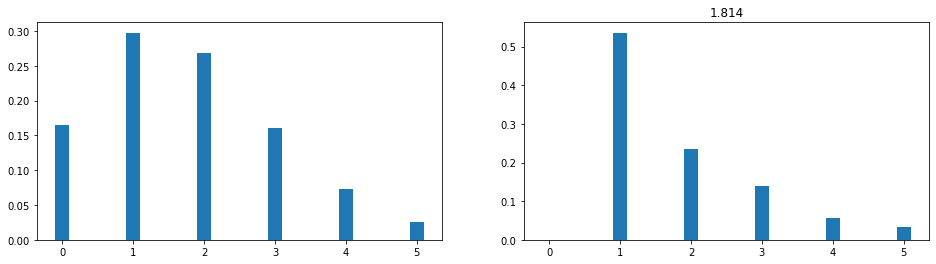

In [2]:
np.random.seed(0)
# measured = np.random.poisson(1.8, size=64)
x = np.array([0, 1,2,3,4,5])
measured_sampl = poisson.rvs(1.6, size = 1000)
for i, m in enumerate(measured_sampl):
    if m == 0:
        measured_sampl[i] = 1
    if m > 5:
        measured_sampl[i] = 5


# print(measured_sampl)
measured = poisson.pmf(x, 1.8)

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.bar(x, measured , width=0.2)
plt.subplot(1,2,2)
data_measured, bins, patches = plt.hist(measured_sampl, rwidth=0.2, density= True, bins = np.array([0, 1,2,3,4,5,6])-0.5)
plt.title(str(measured_sampl.mean()))
print(measured.mean())


[0.    0.536 0.236 0.139 0.056 0.033]
[0.         0.58552632 0.17763158 0.11842105 0.07236842 0.04605263]
mu_s = 1.8157894736842106
mu_m = 1.814
sigma_s = 0.8639208687249328
sigma_m = 0.8184087720639928


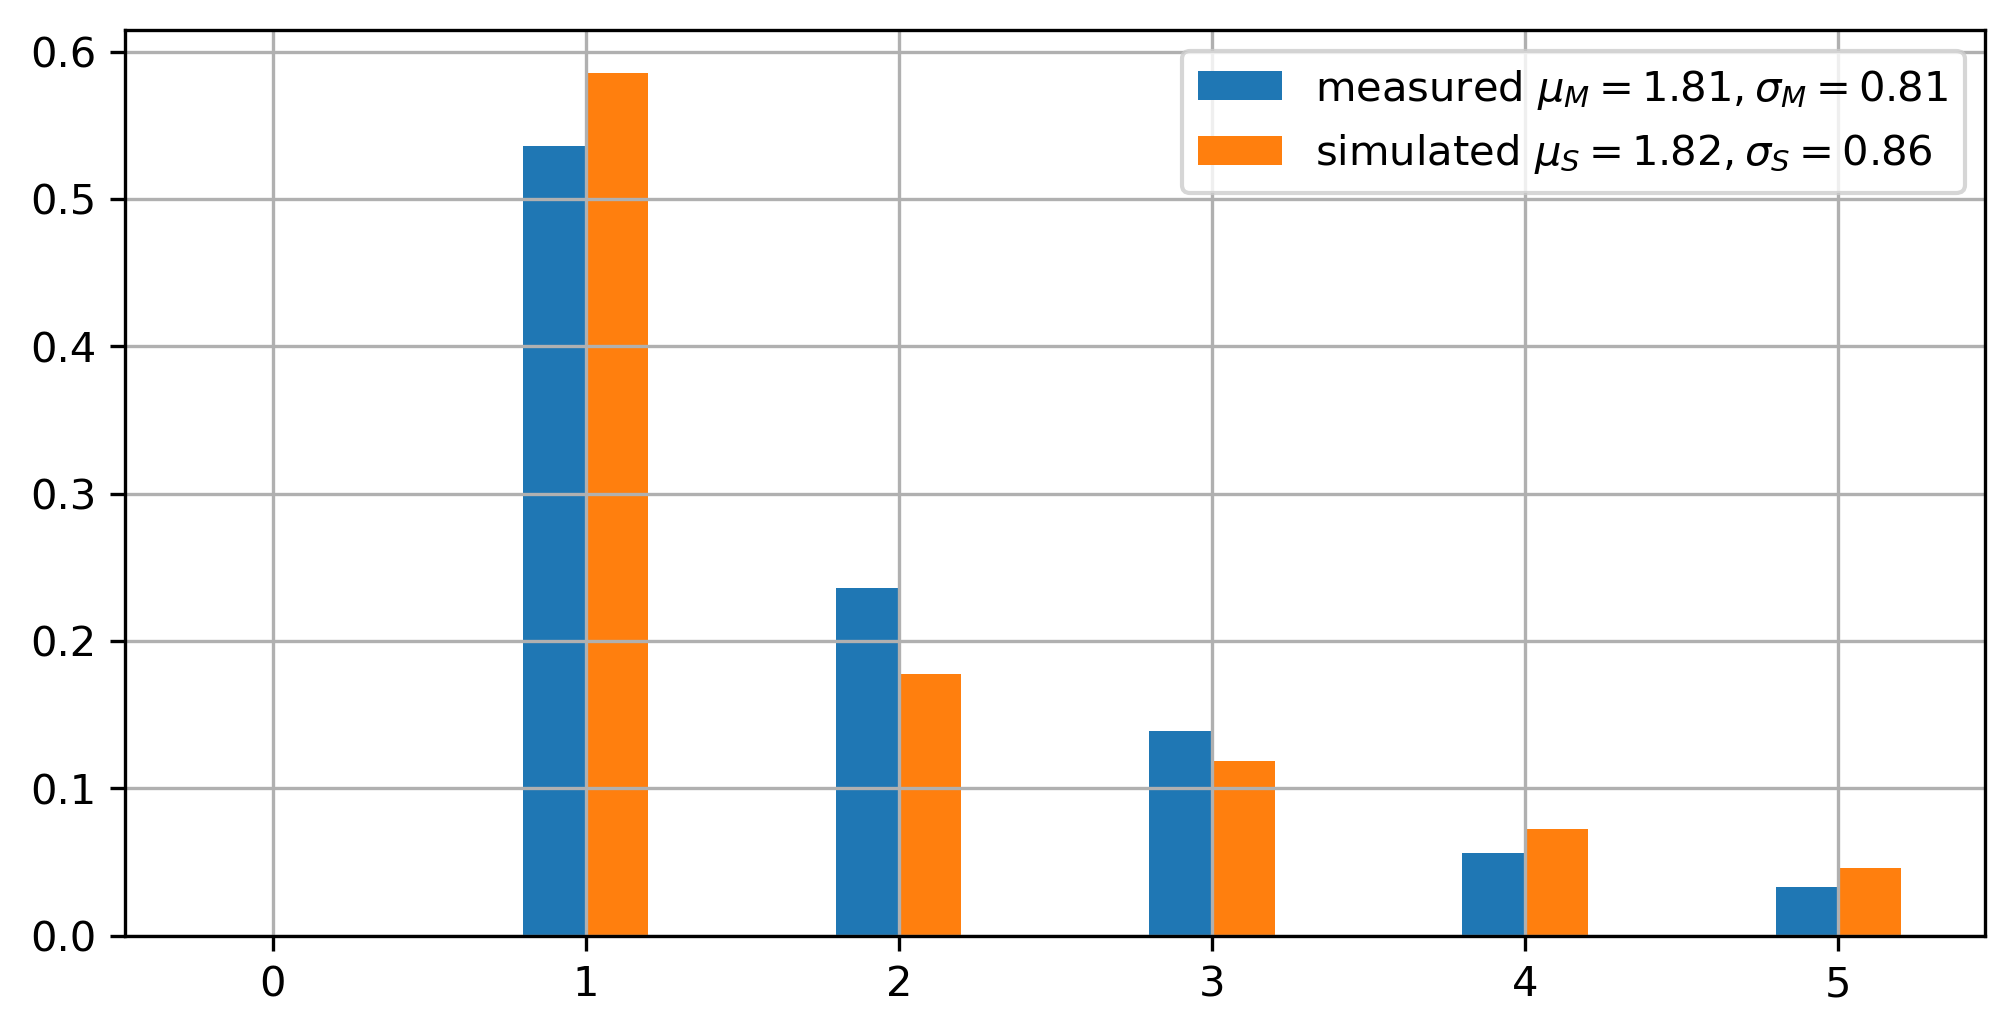

In [3]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.special import gamma as gamma_function
from scipy.special import digamma
alpha_0, alpha_1 = 1, 1
beta_0, beta_1 = 0.001, 1
K=4
p01 = 0.5
p10 = 0.5
trans_pro_C = {
    'p01':p01,
    'p10':p10,
    'p1':p01/(p01+p10)
    }
M = 64
tau = 8
L = 4

## generate channel support
def count_lobes_return_array(p01 = 0.5, p10 = 0.5, M = 64):
    count_list = np.array([0 for i in range(6)])
    # 6 is a nice value
    def count_lobes(seed = 2, p01 = 0.5, p10 = 0.5, M = 64):
        np.random.seed(seed)   
        def common_channel_support(p01 = 0.1, p10=0.3, M= 64):
            p0 = p10/(p10+p01)
            p1 = 1-p0

            # generate Markov chain
            tmp_support = np.array([0.0 for m in range(M)])
            if np.random.uniform(0,1,1)[0] < p0:
                tmp_support[0] = 0
            for i in range(M - 1):
                if tmp_support[i] == 0:
                    if np.random.uniform(0,1,2)[0] < p01:
                        tmp_support[i+1] = 1
                    else:
                        tmp_support[i+1] = 0
                else:
                    if np.random.uniform(0,1,2)[1] < p10:
                        tmp_support[i+1] = 0
                    else:
                        tmp_support[i+1] = 1
            return tmp_support

        common_support_varphi = common_channel_support(p01, p10, M)

        marker_left = 0
        marker_rigth = 1
        state_store_deep_1 = ''
        state = '' # 'up_edge' | 'up_idle' | 'down_idle' | 'down_edge'
        while marker_rigth != M:
            state_store_deep_1 = state
            if common_support_varphi[marker_rigth] ==1 and common_support_varphi[marker_rigth -1] ==0:
                state = 'up_edge'
                marker_left = marker_rigth - 1
            
            elif common_support_varphi[marker_rigth] ==0 and common_support_varphi[marker_rigth -1] ==1:
                state = 'down_edge'
            elif common_support_varphi[marker_rigth] ==1 and common_support_varphi[marker_rigth -1] ==1:
                state = state_store_deep_1
            elif common_support_varphi[marker_rigth] ==0 and common_support_varphi[marker_rigth -1] ==0:
                state = state_store_deep_1
            if state_store_deep_1 == 'up_edge' and state == 'down_edge':
                # print(marker_rigth, marker_rigth - marker_left -1 )
                wdith = marker_rigth - marker_left -1
                if wdith > 5:
                    count_list[5] += 0
                else:
                    count_list[wdith] += 1

            marker_rigth +=1

    for seed in range(10):
        count_lobes(
            seed = seed,
            p10 = p10,
            p01 = p01,
            M = 64
            )
    return np.array(count_list/count_list.sum())

data_sim = count_lobes_return_array(
    p01= 0.5,
    p10 = 0.52, 
    M= 64
)

data_measured = np.array(data_measured)
plt.figure(figsize=(8,4), dpi=300)
plt.grid()
plt.bar(np.array(range(6))-0.1, data_measured, width= 0.2)
plt.bar(np.array(range(6))+0.1, data_sim, width= 0.2)
print(np.array(data_measured))
print(np.array(data_sim))
# measured_sampl
data_sim = np.array(data_sim)
mu_s = np.sum(data_sim * np.array(range(len(data_sim))))
mu_m = np.sum(data_measured * np.array(range(len(data_measured))))
sigma_s = np.power(
    np.sum(np.power(data_sim, 2) * np.power(np.array(range(6)) - mu_s, 2)) / np.sum(np.power(data_sim, 2)),
    0.5)
sigma_m = np.power(
    np.sum(np.power(data_measured, 2) * np.power(np.array(range(6)) - mu_m, 2)) / np.sum(np.power(data_measured, 2)),
    0.5)
print("mu_s = "+ str(mu_s))
print("mu_m = "+ str(mu_m))
print("sigma_s = "+ str(sigma_s))
print("sigma_m = "+ str(sigma_m))
plt.legend(
    [r'measured $\mu_M = 1.81, \sigma_M = 0.81$', r'simulated $\mu_S = 1.82, \sigma_S = 0.86$']
    )

# plt.scatter(range(M), common_support_varphi)
# plt.plot(range(M), common_support_varphi)
# plt.legend(['common_support_varphi'])

# data_sim = np.array(count_list/count_list.sum())
sio.savemat(
    'NumberOfLobes.mat', 
    {
        'Sim_x': [i for i in range(6)], 
        'Sim_y': data_sim, 
        'Sim_Mu':1.82, 
        'Sim_Sigma': 0.86,
        'Mea_x': [i for i in range(6)], 
        'Mea_y': data_measured, 
        'Mea_Mu': 1.81, 
        'Mea_Sigma': 0.81
    }
)

# Gaussian Parameters

![](Channel_property.assets\Parameters.png)

choose NLOS $\sigma_{\theta, AOA} = 10.1 (deg) $

# What is angular spread?

Angular Spread Measurement and Modeling for 3D
MIMO in Urban Macrocellular Radio Channels
$$
\operatorname{ESA}=\sqrt{\frac{\sum_{k=1}^{K}\left(\vartheta_{k}-\mu_{A P S}\right)^{2} \alpha_{k}^{2}}{\sum_{k=1}^{K} \alpha_{k}^{2}}},
$$

$$
\mu_{A P S}=\frac{\sum_{k=1}^{K} \vartheta_{k} \alpha_{k}^{2}}{\sum_{k=1}^{K} \alpha_{k}^{2}}
$$

In [4]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.special import gamma as gamma_function
from scipy.special import digamma
alpha_0, alpha_1 = 1, 1
beta_0, beta_1 = 0.001, 1
K=4
p01 = 0.5
p10 = 0.5
trans_pro_C = {
    'p01':p01,
    'p10':p10,
    'p1':p01/(p01+p10)
    }
M = 64
tau = 8
L = 4

In [5]:
grid_x,grid_y = 10/110, 0.1/92
point_x,ponit_y = 608, 1574


measured_cdf_x = np.array([26, 83, 87, 121, 131, 133 ,139, 169, 175, 188, 218, 302,314, 382,406,418,426,522,554,604]) / 160 *20
measured_cdf_y = np.array([43,91,139,186,233,278,326,372,420,468,513,560,607,656,703,745,795,842,889,935]) / 92 *10

In [6]:
## generate channel support

# 6 is a nice value

def gen_common_channel_support(seed = 2,a = 1, s = 1, e = 0.5, p01 = 0.5, p10 = 0.5):
    np.random.seed(seed)
    def common_channel_support(p01 = 0.1, p10=0.3, M= 64):
        p0 = p10/(p10+p01)
        p1 = 1-p0

        # generate Markov chain
        tmp_support = np.array([0.0 for m in range(M)])
        if np.random.uniform(0,1,1)[0] < p0:
            tmp_support[0] = 0
        for i in range(M - 1):
            if tmp_support[i] == 0:
                if np.random.uniform(0,1,2)[0] < p01:
                    tmp_support[i+1] = 1
                else:
                    tmp_support[i+1] = 0
            else:
                if np.random.uniform(0,1,2)[1] < p10:
                    tmp_support[i+1] = 0
                else:
                    tmp_support[i+1] = 1
        return tmp_support

    common_support_varphi = common_channel_support(p01, p10, M)
    
    common_support_varphi = np.array(common_support_varphi)
    
    # common_support_varphi[int(M/4):] = 0
    r = gamma.rvs(a, size = M)

    Beta_true = np.random.normal(0, np.power(r, e), M)
    # Beta_true = np.random.normal(0,1, M)

    Delta_varphi_min = 0
    Delta_varphi_max = 1/M * np.pi
    Delta_varphi = np.random.uniform(Delta_varphi_min, Delta_varphi_max, M)
    Varphi_grid = np.array([m/M if m/M < 0.5 else m/M - 1 for m in range(M)])
    Varphi_true = common_support_varphi * (Delta_varphi + Varphi_grid)
    
    # delete the zeros in Varphi_true and corresponding indexes in Beta_true
    Beta_true = Beta_true[Varphi_true != 0]
    Varphi_true = Varphi_true[Varphi_true != 0]
    
    return Varphi_true, Beta_true
gen_common_channel_support(seed = 2,a = 1, s = 1, e = 0.5, p01 = 0.5, p10 = 0.5)


(array([ 0.04767449,  0.05118426,  0.08701719,  0.15651707,  0.20479065,
         0.22805358,  0.25476393,  0.29670715,  0.30746036,  0.312712  ,
         0.35183855,  0.42899951,  0.45029806,  0.47288944,  0.49018498,
         0.48511407, -0.45044566, -0.44841883, -0.37561404, -0.35484026,
        -0.36880713, -0.34704018, -0.28378455, -0.29838074, -0.24845475,
        -0.23144485, -0.16909106, -0.16128234, -0.09432722, -0.06567898,
        -0.05002068, -0.01431584]),
 array([-0.42689609, -0.20428459, -0.08897397,  2.59834294, -3.20536779,
         0.52625051,  0.37964138, -0.12883443,  0.25957583, -1.17645797,
         0.96533142,  0.62810364, -0.0405623 , -0.19861882,  0.27455142,
        -0.29833062, -0.53695755,  1.11851957, -1.2691673 , -0.10105556,
        -0.60233629,  1.17239165,  0.85760511,  0.45014575, -0.71706508,
         0.85181281,  0.26805258, -0.24593879, -1.24847595, -0.73137365,
         0.27742094,  0.09960729]))

In [7]:
## generate channel support

# 6 is a nice value

def gen_common_channel_support(seed = 2,a = 1, s = 1, e = 0.5, p01 = 0.5, p10 = 0.5):
    np.random.seed(seed)
    def common_channel_support(p01 = 0.1, p10=0.3, M= 64):
        p0 = p10/(p10+p01)
        p1 = 1-p0

        # generate Markov chain
        tmp_support = np.array([0.0 for m in range(M)])
        if np.random.uniform(0,1,1)[0] < p0:
            tmp_support[0] = 0
        for i in range(M - 1):
            if tmp_support[i] == 0:
                if np.random.uniform(0,1,2)[0] < p01:
                    tmp_support[i+1] = 1
                else:
                    tmp_support[i+1] = 0
            else:
                if np.random.uniform(0,1,2)[1] < p10:
                    tmp_support[i+1] = 0
                else:
                    tmp_support[i+1] = 1
        return tmp_support

    common_support_varphi = common_channel_support(p01, p10, M)
    
    common_support_varphi = np.array(common_support_varphi)
    
    # common_support_varphi[int(M/4):] = 0
    r = gamma.rvs(a, size = M)

    Beta_true = np.random.normal(0, np.power(r, e), M)
    # Beta_true = np.random.normal(0,1, M)

    Delta_varphi_min = 0
    Delta_varphi_max = 1/M * np.pi
    Delta_varphi = np.random.uniform(Delta_varphi_min, Delta_varphi_max, M)
    Varphi_grid = np.array([m/M if m/M < 0.5 else m/M - 1 for m in range(M)])
    Varphi_true = common_support_varphi * (Delta_varphi + Varphi_grid)
    
    # delete the zeros in Varphi_true and corresponding indexes in Beta_true
    Beta_true = Beta_true[Varphi_true != 0]
    Varphi_true = Varphi_true[Varphi_true != 0]
    
    return Varphi_true, Beta_true
gen_common_channel_support(seed = 2,a = 1, s = 1, e = 0.5, p01 = 0.5, p10 = 0.5)


(array([ 0.04767449,  0.05118426,  0.08701719,  0.15651707,  0.20479065,
         0.22805358,  0.25476393,  0.29670715,  0.30746036,  0.312712  ,
         0.35183855,  0.42899951,  0.45029806,  0.47288944,  0.49018498,
         0.48511407, -0.45044566, -0.44841883, -0.37561404, -0.35484026,
        -0.36880713, -0.34704018, -0.28378455, -0.29838074, -0.24845475,
        -0.23144485, -0.16909106, -0.16128234, -0.09432722, -0.06567898,
        -0.05002068, -0.01431584]),
 array([-0.42689609, -0.20428459, -0.08897397,  2.59834294, -3.20536779,
         0.52625051,  0.37964138, -0.12883443,  0.25957583, -1.17645797,
         0.96533142,  0.62810364, -0.0405623 , -0.19861882,  0.27455142,
        -0.29833062, -0.53695755,  1.11851957, -1.2691673 , -0.10105556,
        -0.60233629,  1.17239165,  0.85760511,  0.45014575, -0.71706508,
         0.85181281,  0.26805258, -0.24593879, -1.24847595, -0.73137365,
         0.27742094,  0.09960729]))

In [8]:

def cum_func(a = 1, s = 1, e = 0.5, p01 = 0.5, p10 = 0.5):
    cum_list = []
    for i in range(256):
        Varphi_true, Beta_true = gen_common_channel_support(
            seed = i,
            a= a,
            s = s,
            e= e,
            p01 = p01,
            p10 = p10
            )
        Beta_true = Beta_true
        mu_APS_rad = np.sum(Varphi_true * np.power(Beta_true,2)) / np.sum(np.power(Beta_true,2))
        ESA_rad = np.power(
            np.sum(np.power(Varphi_true - mu_APS_rad, 2) * np.power(Beta_true, 2)) / np.sum(np.power(Beta_true, 2)),
            0.5
            ) * np.pi 
        cum_list.append(ESA_rad)
    return cum_list
# pdf, bins, patches = plt.hist(np.array(cum_list) * 180 / np.pi, bins = [-0.5+i for i in range(180 + 1)], density=True)
# cdf = np.cumsum(pdf) * 100

In [9]:
def plot_cum_list(cum_list, if_save_mat = False):
    pdf, bins, patches = plt.hist(np.array(cum_list) * 180 / np.pi, bins = [-0.5+i for i in range(180 + 1)], density=True)
    cdf = np.cumsum(pdf) * 100
    plt.figure(figsize=(8,4), dpi=300)
    plt.plot([i for i in range(180)], cdf)
    plt.scatter(measured_cdf_x, measured_cdf_y, color='r')
    plt.xlim(left=0, right=180)
    plt.grid()
    plt.legend(
        [r'simulated $\mu_S = 30\ (deg)$',
        r'measured $\mu_M = 33\ (deg)$']
        )
    print(np.sum(np.array(cum_list) * 180 / np.pi)/ len(cum_list))
    print(measured_cdf_x.sum()/ len(measured_cdf_x))
    if if_save_mat:
        sio.savemat(
        'AS_NLoS_3LHS.mat', {
            'AS_NLoS_3LHS':{
            'Sim_3LHS_x': [i for i in range(180)], 
            'Sim_3LHS_y': cdf, 
            'Mea_x': measured_cdf_x, 
            'Mea_y': measured_cdf_y, 
            }
        }
    )


36.06986276700887
33.7375


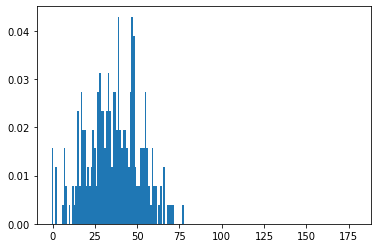

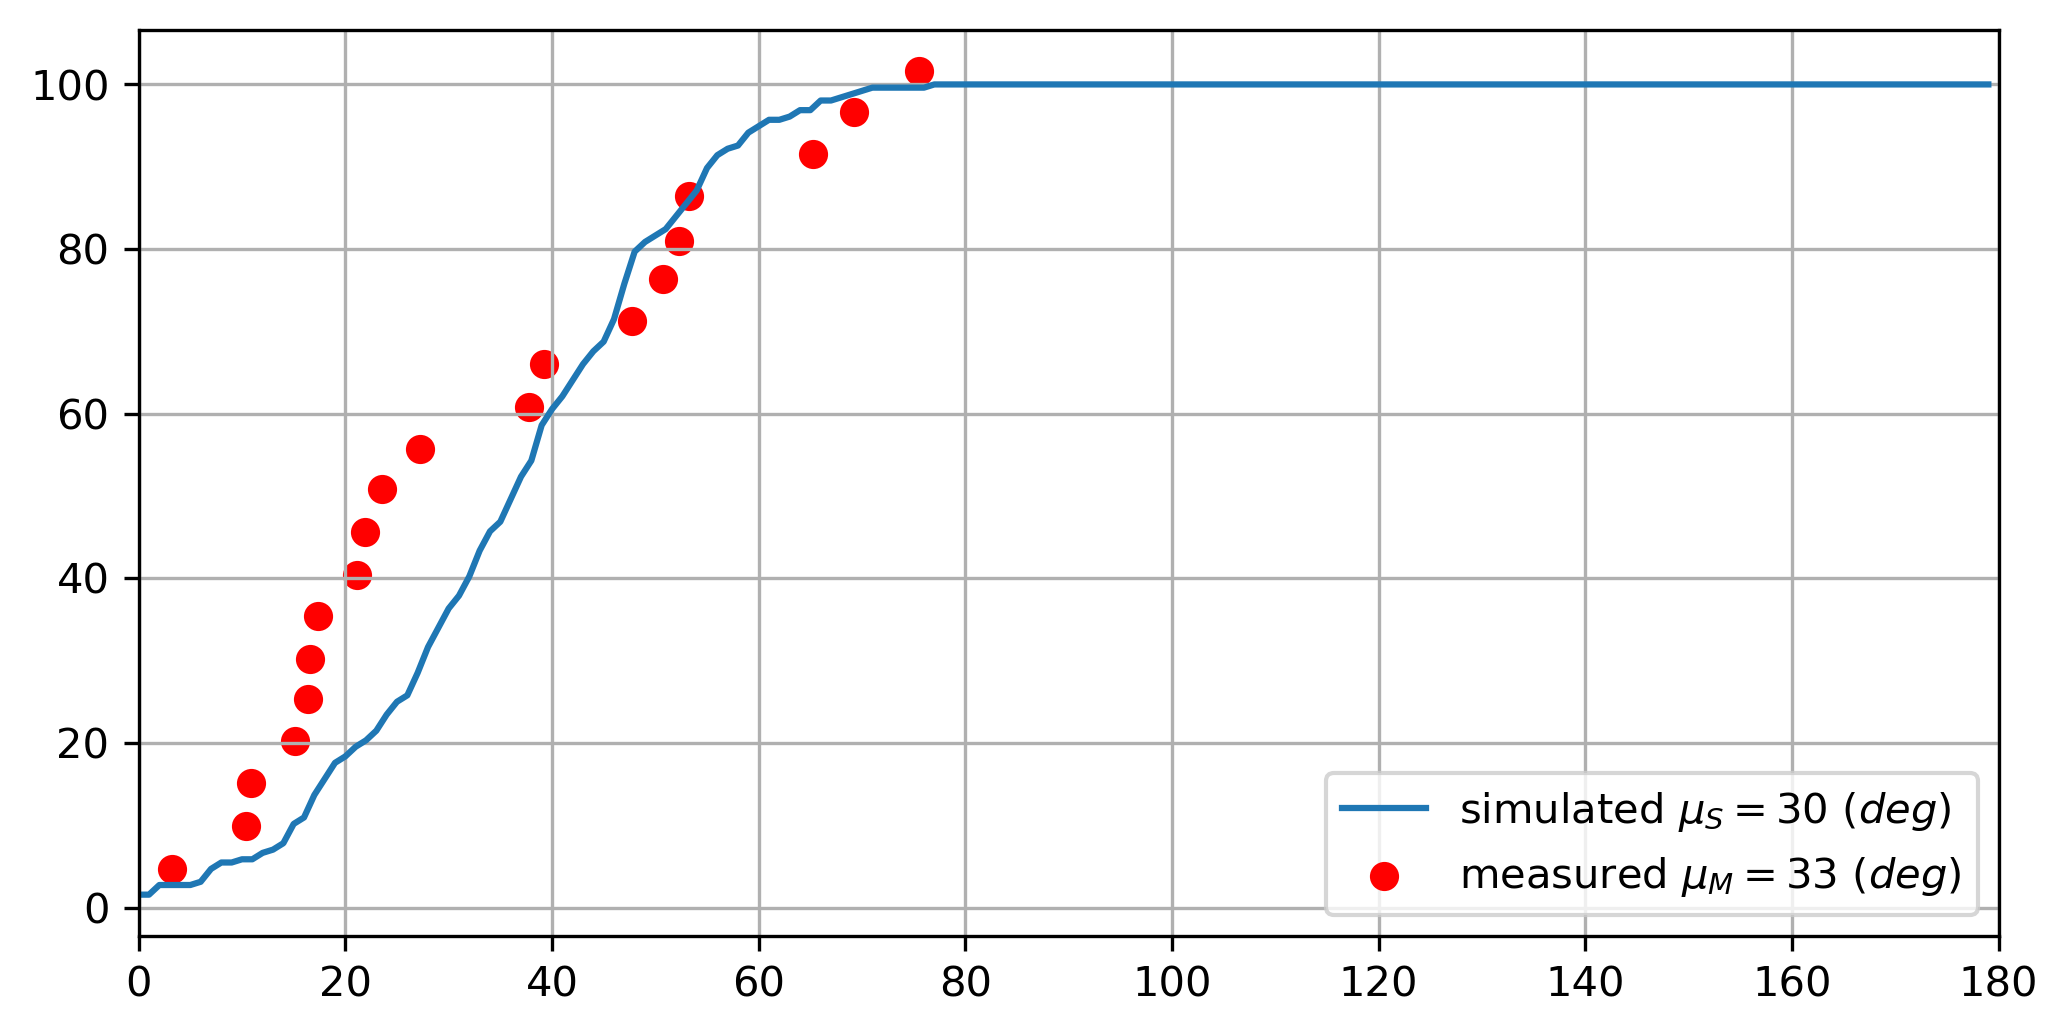

In [10]:
plot_cum_list(cum_func(a = 1, s = 1, e = 0.5, p01 = 0.1, p10 = 0.5))

In [11]:
measured_cdf_x.size, measured_cdf_y.size

(20, 20)

0.049016947517392204

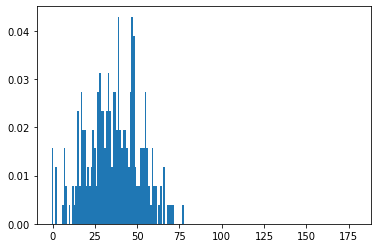

In [12]:
def cal_NMSE(cum_list):
    pdf, bins, patches = plt.hist(np.array(cum_list) * 180 / np.pi, bins = [-0.5+i for i in range(180 + 1)], density=True)
    cdf = np.cumsum(pdf) * 100
    NMSE = 0
    for  measured_cdf_x_index, measured_cdf_x_value in enumerate(measured_cdf_x):
        sim_cdf_x_index = np.argmin(np.abs(bins - measured_cdf_x_value))
        sim_cdf_y_value = cdf[sim_cdf_x_index]
        
        NMSE += np.power(measured_cdf_y[measured_cdf_x_index] - sim_cdf_y_value, 2)
    NMSE = NMSE / np.sum(np.power(
        np.array(measured_cdf_y),
        2
    ))
    return NMSE
cal_NMSE(cum_func(a = 1, s = 1, e = 0.5, p01 = 0.1, p10 = 0.5))

0.24628750767456997

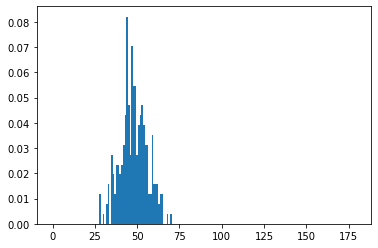

In [13]:
cal_NMSE(cum_func(
        a = 1,
        p01= 0.5,
        p10= 0.5
    ))

/var/folders/fp/9yctk2816xdflc6mnw2fhtfc0000gn/T/ipykernel_39841/1765770929.py:8: RuntimeWarning: invalid value encountered in double_scalars
  p0 = p10/(p10+p01)
/var/folders/fp/9yctk2816xdflc6mnw2fhtfc0000gn/T/ipykernel_39841/496640656.py:13: RuntimeWarning: invalid value encountered in double_scalars
  mu_APS_rad = np.sum(Varphi_true * np.power(Beta_true,2)) / np.sum(np.power(Beta_true,2))
/var/folders/fp/9yctk2816xdflc6mnw2fhtfc0000gn/T/ipykernel_39841/496640656.py:15: RuntimeWarning: invalid value encountered in double_scalars
  np.sum(np.power(Varphi_true - mu_APS_rad, 2) * np.power(Beta_true, 2)) / np.sum(np.power(Beta_true, 2)),
/Users/brook1711/opt/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6611: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/Users/brook1711/opt/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6612: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/Users/brook1711/opt/an

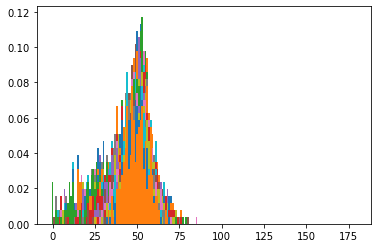

In [14]:
test_a = [1,2]
test_p01 = np.linspace(0,0.2,11)
test_p10 = np.linspace(0,1,11)

test_para_peer = [{'a':a, 'p01':p01, 'p10':p10} for a in test_a for p01 in test_p01 for p10 in test_p10]

NMSE_list = []

for para_dic in test_para_peer:
    NMSE_list.append(cal_NMSE(cum_func(
        a = para_dic['a'],
        p01= para_dic['p01'],
        p10= para_dic['p10']
    )))

In [15]:
np.argmin(NMSE_list)

0

In [16]:
NMSE_list = np.array(NMSE_list)
for i, NMSE in enumerate(NMSE_list):
    test_para_peer[i]['NMSE'] = NMSE

In [17]:
sorted_res = sorted(test_para_peer,key = lambda keys:keys['NMSE'],reverse = False)

In [18]:
sorted_res

[{'a': 1, 'p01': 0.0, 'p10': 0.0, 'NMSE': nan},
 {'a': 1, 'p01': 0.0, 'p10': 0.1, 'NMSE': nan},
 {'a': 1, 'p01': 0.0, 'p10': 0.2, 'NMSE': nan},
 {'a': 1, 'p01': 0.0, 'p10': 0.30000000000000004, 'NMSE': nan},
 {'a': 1, 'p01': 0.0, 'p10': 0.4, 'NMSE': nan},
 {'a': 1, 'p01': 0.0, 'p10': 0.5, 'NMSE': nan},
 {'a': 1, 'p01': 0.0, 'p10': 0.6000000000000001, 'NMSE': nan},
 {'a': 1, 'p01': 0.0, 'p10': 0.7000000000000001, 'NMSE': nan},
 {'a': 1, 'p01': 0.0, 'p10': 0.8, 'NMSE': nan},
 {'a': 1, 'p01': 0.0, 'p10': 0.9, 'NMSE': nan},
 {'a': 1, 'p01': 0.0, 'p10': 1.0, 'NMSE': nan},
 {'a': 1, 'p01': 0.1, 'p10': 1.0, 'NMSE': 0.03194238918007774},
 {'a': 1, 'p01': 0.1, 'p10': 0.8, 'NMSE': 0.035387418304244064},
 {'a': 1, 'p01': 0.1, 'p10': 0.9, 'NMSE': 0.03632845440529941},
 {'a': 1, 'p01': 0.1, 'p10': 0.6000000000000001, 'NMSE': 0.043298985981767235},
 {'a': 1, 'p01': 0.1, 'p10': 0.7000000000000001, 'NMSE': 0.04427246233313989},
 {'a': 1, 'p01': 0.1, 'p10': 0.5, 'NMSE': 0.049016947517392204},
 {'a': 1,

33.101684899838844
33.7375


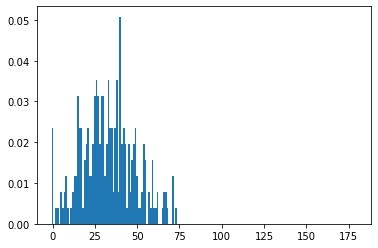

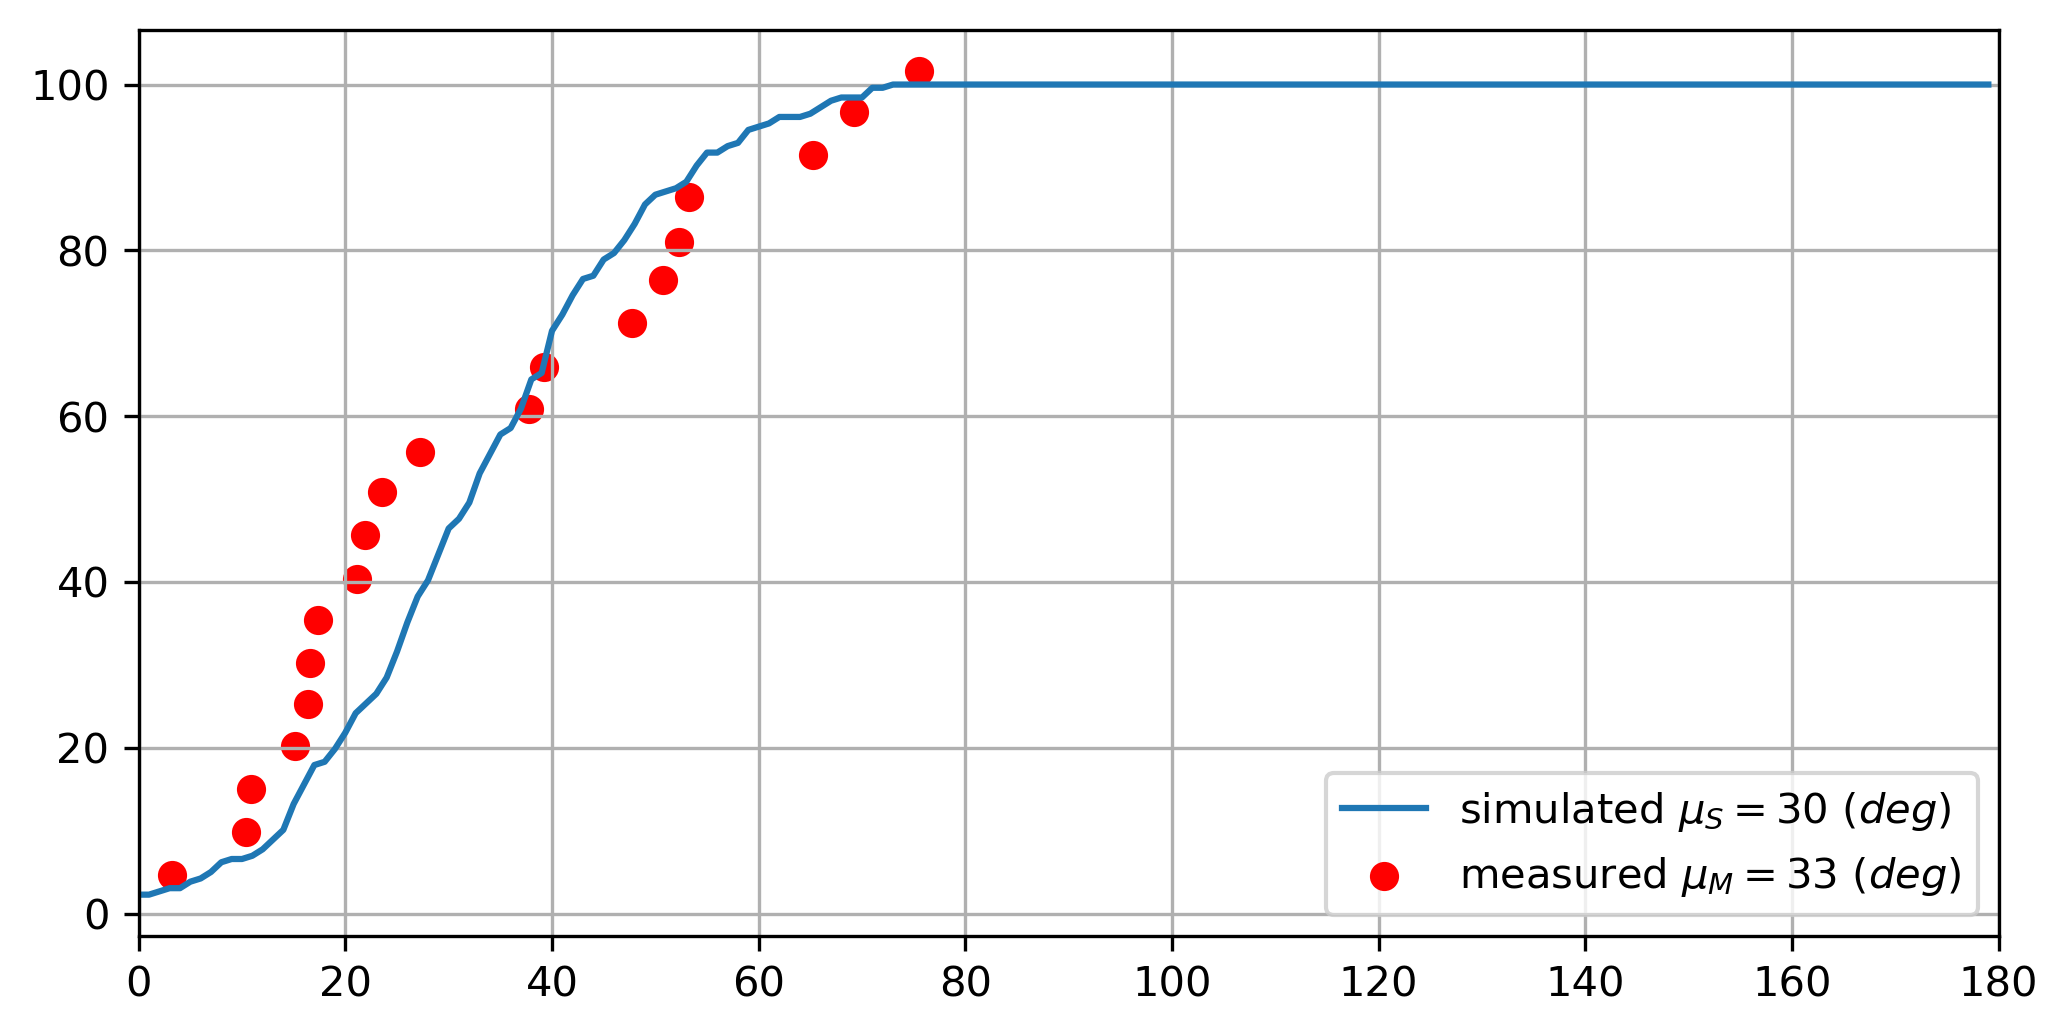

In [20]:
plot_cum_list(cum_func(a=1, p01=0.1, p10=1.0), if_save_mat= True)